In [1]:
import tushare as ts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.parser import parse
from dateutil.relativedelta import relativedelta
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

In [2]:
research_starttime='2010-04-01'
research_endtime='2018-04-01'
format='%Y-%m-%d %H:%M:%S'
data_type=""#"net"
data_mode=""#"fast"
data_mode_global=data_mode
# %load /usr/local/lib/python3.6/site-packages/statsmodels/compat/python.py

In [3]:
#转换索引
def trans_index(df):
    if(type(df.index[0])==str):
        df.index=pd.to_datetime(df.index)
    return df
        
#get_all_instruments
def all_instruments_cs():
    df_market=None
    if(data_type=="net"):
        df_market = all_instruments(type='CS')
    else:
        df_market=pd.read_csv("all_instruments.csv",index_col=0)
    return df_market

#get_price_cs
def get_price_cs(data_starttime,data_endtime):
    df_price_data=None
    df_market=all_instruments_cs()
    if(data_type=="net"):
        df_price_data = get_price(list(df_market['order_book_id']),start_date=data_starttime, end_date=data_endtime,frequency='1d',fields='close')
    else:
        df_price_data=pd.read_csv("price_data.csv",index_col=0)
        df_price_data=trans_index(df_price_data)
    return df_price_data

#转换Series
def trans_series(df,key=1):
    if(type(df)==pd.DataFrame):
        df=df[key]
    return df

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
df_book_value=pd.read_csv("./book_value_per_share.csv",index_col=0)
df_market_cap=pd.read_csv("./market_cap.csv",index_col=0)
df_return_on_equity=pd.read_csv("./return_on_equity.csv",index_col=0)
df_total_assets=pd.read_csv("./total_assets.csv",index_col=0)

df_book_value=trans_index(df_book_value)
df_market_cap=trans_index(df_market_cap)
df_return_on_equity=trans_index(df_return_on_equity)    
df_total_assets=trans_index(df_total_assets) 

In [6]:
index_date = df_book_value.index
stocks = df_book_value.columns
data_count=len(index_date)
data_starttime=index_date[0]
data_endtime=index_date[-1]
data_starttime,data_endtime

(Timestamp('2010-04-02 00:00:00'), Timestamp('2018-03-30 00:00:00'))

In [7]:
arr_ydyl=['000022.XSHE', '000042.XSHE', '000065.XSHE', '000088.XSHE', '000090.XSHE', '000151.XSHE', '000157.XSHE', '000159.XSHE', '000400.XSHE', '000425.XSHE', '000498.XSHE', '000507.XSHE', '000528.XSHE', '000564.XSHE', '000582.XSHE', '000610.XSHE', '000617.XSHE', '000672.XSHE', '000680.XSHE', '000703.XSHE', '000777.XSHE', '000797.XSHE', '000852.XSHE', '000862.XSHE', '000877.XSHE', '000905.XSHE', '000928.XSHE', '000939.XSHE', '000978.XSHE', '600026.XSHG', '600028.XSHG', '600031.XSHG', '600068.XSHG', '600089.XSHG', '600105.XSHG', '600118.XSHG', '600125.XSHG', '600150.XSHG', '600170.XSHG', '600176.XSHG', '600179.XSHG', '600190.XSHG', '600202.XSHG', '600256.XSHG', '600279.XSHG', '600312.XSHG', '600317.XSHG', '600320.XSHG', '600339.XSHG', '600350.XSHG', '600368.XSHG', '600406.XSHG', '600425.XSHG', '600428.XSHG', '600449.XSHG', '600477.XSHG', '600487.XSHG', '600495.XSHG', '600509.XSHG', '600522.XSHG', '600528.XSHG', '600540.XSHG', '600580.XSHG', '600581.XSHG', '600583.XSHG', '600706.XSHG', '600717.XSHG', '600720.XSHG', '600778.XSHG', '600798.XSHG', '600801.XSHG', '600820.XSHG', '600888.XSHG', '600984.XSHG', '002040.XSHE', '600970.XSHG', '002047.XSHE', '002051.XSHE', '600017.XSHG', '600018.XSHG', '601872.XSHG', '601008.XSHG', '002135.XSHE', '601919.XSHG', '002146.XSHE', '601808.XSHG', '601857.XSHG', '601390.XSHG', '601866.XSHG', '002205.XSHE', '002207.XSHE', '601186.XSHG', '601668.XSHG', '002266.XSHE', '601766.XSHG', '601727.XSHG', '601989.XSHG', '002302.XSHE', '002307.XSHE', '002309.XSHE', '601618.XSHG', '601117.XSHG', '300011.XSHE', '002323.XSHE', '002353.XSHE', '601179.XSHG', '601106.XSHG', '002459.XSHE', '300090.XSHE', '300103.XSHE', '601018.XSHG', '002475.XSHE', '601028.XSHG', '002554.XSHE', '002738.XSHE', '601880.XSHG', '002524.XSHE', '300183.XSHE', '601789.XSHG', '300208.XSHE', '300262.XSHE', '601669.XSHG', '601800.XSHG', '603333.XSHG', '603308.XSHG', '300351.XSHE', '603111.XSHG', '600023.XSHG', '300523.XSHE', '300374.XSHE', '603969.XSHG', '603569.XSHG', '603338.XSHG', '603018.XSHG', '603169.XSHG', '002828.XSHE', '603036.XSHG', '603298.XSHG', '603966.XSHG', '603218.XSHG', '601228.XSHG', '600326.XSHG', '603588.XSHG', '603619.XSHG', '600219.XSHG', '300065.XSHE', '002742.XSHE', '600415.XSHG', '603871.XSHG', '300732.XSHE', '600338.XSHG', '600010.XSHG', '600039.XSHG', '601899.XSHG', '002800.XSHE', '601500.XSHG', '300589.XSHE']
if(data_type=="net"):
    arr_ydyl=concept('一带一路')


In [8]:
Rm_Rf=pd.read_csv("./Rm_Rf.csv",index_col=0,header=None)
Rm_Rf=trans_series(trans_index(Rm_Rf))
Rm_Rf

SMB=pd.read_csv("./smb.csv",index_col=0,header=None)
SMB=trans_series(trans_index(SMB))
SMB

HML=pd.read_csv("./hml.csv",index_col=0,header=None)
HML=trans_series(trans_index(HML))
HML

CMA=pd.read_csv("./cma.csv",index_col=0,header=None)
CMA=trans_series(trans_index(CMA))
CMA

RMW=pd.read_csv("./rmw.csv",index_col=0,header=None)
RMW=trans_series(trans_index(RMW))
RMW

Exchange=pd.read_csv("./exchange_rate.csv",index_col=0,header=None)
Exchange=trans_series(trans_index(Exchange))
Exchange

y=pd.read_csv("./y.csv",index_col=0,header=None)
y0=trans_series(trans_index(y))
y=y0[1:]

0
2010-04-02         NaN
2010-05-04   -0.115266
2010-06-04   -0.092520
2010-07-06   -0.067556
2010-08-06    0.129191
2010-09-08    0.027325
2010-10-08    0.019798
2010-11-10    0.147831
2010-12-10   -0.097940
2011-01-11   -0.013594
2011-02-11   -0.003436
2011-03-11    0.038340
2011-04-13    0.036011
2011-05-13   -0.074717
2011-06-15   -0.055114
2011-07-15    0.053361
2011-08-16   -0.076510
2011-09-16   -0.059042
2011-10-18   -0.054441
2011-11-18    0.002928
2011-12-20   -0.090603
2012-01-20    0.050849
2012-02-29    0.049355
2012-03-30   -0.070630
2012-04-11    0.023950
2012-05-11    0.043797
2012-06-13   -0.023718
2012-07-13   -0.052543
2012-08-14   -0.040368
2012-09-14   -0.019763
                ...   
2015-10-30    0.102467
2015-11-30    0.008232
2015-12-31    0.045234
2016-02-01   -0.223365
2016-03-01    0.009302
2016-04-01    0.098446
2016-04-06    0.010143
2016-05-06   -0.039956
2016-06-08    0.009827
2016-07-12    0.033595
2016-08-12    0.005515
2016-09-14   -0.017765
2016-10-1

0
2010-04-02    0.000000
2010-05-04    0.072521
2010-06-04    0.063869
2010-07-06    0.033867
2010-08-06   -0.090692
2010-09-08   -0.017744
2010-10-08   -0.024794
2010-11-10   -0.130030
2010-12-10    0.060862
2011-01-11    0.005458
2011-02-11   -0.007782
2011-03-11   -0.030101
2011-04-13   -0.033197
2011-05-13    0.041192
2011-06-15    0.032963
2011-07-15   -0.051744
2011-08-16    0.049584
2011-09-16    0.036984
2011-10-18    0.024557
2011-11-18   -0.013176
2011-12-20    0.050213
2012-01-20   -0.049039
2012-02-29   -0.039565
2012-03-30    0.047447
2012-04-11   -0.014933
2012-05-11   -0.033474
2012-06-13    0.009621
2012-07-13    0.025162
2012-08-14    0.011435
2012-09-14    0.007234
                ...   
2015-10-30   -0.089938
2015-11-30   -0.025595
2015-12-31   -0.025909
2016-02-01    0.151607
2016-03-01   -0.014541
2016-04-01   -0.075211
2016-04-06   -0.010317
2016-05-06    0.028574
2016-06-08   -0.018613
2016-07-12   -0.044721
2016-08-12   -0.011503
2016-09-14    0.011056
2016-10-1

0
2010-04-02    0.000000
2010-05-04   -0.071589
2010-06-04   -0.049275
2010-07-06   -0.005557
2010-08-06    0.015207
2010-09-08   -0.032602
2010-10-08   -0.031514
2010-11-10    0.018759
2010-12-10   -0.029972
2011-01-11    0.007826
2011-02-11   -0.008489
2011-03-11   -0.006618
2011-04-13    0.020230
2011-05-13   -0.018868
2011-06-15   -0.027779
2011-07-15   -0.008958
2011-08-16   -0.028497
2011-09-16    0.000335
2011-10-18    0.004735
2011-11-18   -0.003222
2011-12-20    0.009006
2012-01-20   -0.007342
2012-02-29   -0.014373
2012-03-30   -0.007823
2012-04-11   -0.011268
2012-05-11   -0.009420
2012-06-13   -0.018366
2012-07-13   -0.024731
2012-08-14    0.009694
2012-09-14   -0.003212
                ...   
2015-10-30    0.006602
2015-11-30   -0.024249
2015-12-31    0.005068
2016-02-01   -0.086866
2016-03-01    0.004257
2016-04-01    0.035953
2016-04-06   -0.001547
2016-05-06   -0.020999
2016-06-08   -0.006409
2016-07-12    0.006119
2016-08-12    0.016789
2016-09-14   -0.020628
2016-10-1

0
2010-04-02    0.000000
2010-05-04    0.051764
2010-06-04    0.045896
2010-07-06    0.022781
2010-08-06   -0.073459
2010-09-08   -0.016918
2010-10-08   -0.031813
2010-11-10   -0.088691
2010-12-10    0.028092
2011-01-11    0.002075
2011-02-11   -0.003402
2011-03-11   -0.017280
2011-04-13   -0.007224
2011-05-13    0.020267
2011-06-15    0.013084
2011-07-15   -0.058743
2011-08-16    0.005121
2011-09-16    0.034821
2011-10-18    0.027782
2011-11-18    0.000357
2011-12-20    0.013863
2012-01-20   -0.013198
2012-02-29   -0.027667
2012-03-30    0.020256
2012-04-11   -0.009407
2012-05-11   -0.024452
2012-06-13   -0.002426
2012-07-13   -0.003377
2012-08-14    0.008065
2012-09-14    0.005348
                ...   
2015-10-30   -0.047610
2015-11-30   -0.030947
2015-12-31   -0.013603
2016-02-01    0.051122
2016-03-01    0.005240
2016-04-01   -0.035842
2016-04-06   -0.007805
2016-05-06    0.008564
2016-06-08   -0.011418
2016-07-12   -0.003757
2016-08-12   -0.002698
2016-09-14   -0.000429
2016-10-1

0
2010-04-02    0.000000
2010-05-04   -0.059653
2010-06-04   -0.055799
2010-07-06   -0.021232
2010-08-06    0.068714
2010-09-08    0.009074
2010-10-08    0.022023
2010-11-10    0.112015
2010-12-10   -0.047111
2011-01-11   -0.003005
2011-02-11    0.001837
2011-03-11    0.015860
2011-04-13    0.023954
2011-05-13   -0.032229
2011-06-15   -0.024353
2011-07-15    0.031788
2011-08-16   -0.022648
2011-09-16   -0.031021
2011-10-18   -0.014331
2011-11-18    0.006063
2011-12-20   -0.030521
2012-01-20    0.046103
2012-02-29    0.021519
2012-03-30   -0.034879
2012-04-11    0.006767
2012-05-11    0.028260
2012-06-13   -0.013471
2012-07-13   -0.011125
2012-08-14   -0.001020
2012-09-14   -0.007077
                ...   
2015-10-30    0.052309
2015-11-30    0.026915
2015-12-31    0.018101
2016-02-01   -0.110696
2016-03-01   -0.001176
2016-04-01    0.060940
2016-04-06    0.005070
2016-05-06   -0.005344
2016-06-08    0.021405
2016-07-12    0.027043
2016-08-12    0.023506
2016-09-14   -0.006605
2016-10-1

0
2010-04-02         NaN
2010-05-04    0.000132
2010-06-04    0.000322
2010-07-06   -0.007058
2010-08-06   -0.001799
2010-09-08    0.003827
2010-10-08   -0.017986
2010-11-10   -0.005680
2010-12-10    0.003196
2011-01-11   -0.005409
2011-02-11   -0.004155
2011-03-11   -0.002624
2011-04-13   -0.006236
2011-05-13   -0.005434
2011-06-15   -0.002493
2011-07-15   -0.003055
2011-08-16   -0.012256
2011-09-16    0.000031
2011-10-18   -0.000329
2011-11-18   -0.003777
2011-12-20   -0.001542
2012-01-20   -0.002048
2012-02-29   -0.006347
2012-03-30    0.000667
2012-04-11    0.001747
2012-05-11    0.000190
2012-06-13    0.009318
2012-07-13    0.001602
2012-08-14   -0.003198
2012-09-14   -0.006904
                ...   
2015-10-30   -0.006135
2015-11-30    0.012678
2015-12-31    0.014910
2016-02-01    0.013059
2016-03-01   -0.003998
2016-04-01   -0.011218
2016-04-06    0.000355
2016-05-06    0.002963
2016-06-08    0.009600
2016-07-12    0.019200
2016-08-12   -0.007954
2016-09-14    0.005742
2016-10-1

In [9]:
def get_df_xy(index_date,factors):
    df_xy_new=pd.DataFrame(factors,index=index_date).copy()
    df_xy_new = df_xy_new[1:]
    return df_xy_new

def get_vif(results):
    import statsmodels.stats.outliers_influence as sso
    from statsmodels.compat import lzip
    x_len=results.model.exog.shape[1]
    vif=[]
    for i in range(x_len):
        vif.append(sso.variance_inflation_factor(results.model.exog, i))
#         print(results.model.exog_names[i],sso.variance_inflation_factor(results.model.exog, i))

    ziped=lzip(results.model.exog_names, vif)
    return ziped

In [10]:
df_X=get_df_xy(index_date,{'SMB':SMB,'HML':HML,'CMA':CMA,'Exchange':Exchange})
# df_X=get_df_xy(index_date,{"Rm_Rf":Rm_Rf,'SMB':SMB,'HML':HML,'RMW':RMW,'CMA':CMA,'Exchange':Exchange})
df_xy=get_df_xy(index_date,{"y":y0,"Rm_Rf":Rm_Rf,'SMB':SMB,'HML':HML,'RMW':RMW,'CMA':CMA,'Exchange':Exchange})
# df_X=get_df_X(index_date,{"Rm_Rf":Rm_Rf,'SMB':smb,'HML':hml})
df_xy.index.name="date"
df_xy.describe()
# df_xy.corr(method='pearson')
# df_xy.plot()
# df_xy.values
df_X

,CMA,Exchange,HML,RMW,Rm_Rf,SMB,y
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,-0.006765,-0.000848,-0.008217,0.010644,0.002328,-0.013002,0.006722
std,0.029092,0.008558,0.030692,0.042558,0.073005,0.054759,0.079759
min,-0.131520,-0.034406,-0.099511,-0.110696,-0.223365,-0.213241,-0.224896
25%,-0.016646,-0.005557,-0.020814,-0.013435,-0.040162,-0.033335,-0.034329
50%,-0.005898,-0.001542,-0.007342,0.006767,0.005440,-0.012613,0.000989
75%,0.008314,0.001744,0.008408,0.026979,0.036263,0.018532,0.036767
max,0.053428,0.028843,0.077680,0.156627,0.277888,0.151607,0.342380


,CMA,Exchange,HML,SMB
2010-05-04,0.051764,0.000132,-0.071589,0.072521
2010-06-04,0.045896,0.000322,-0.049275,0.063869
2010-07-06,0.022781,-0.007058,-0.005557,0.033867
2010-08-06,-0.073459,-0.001799,0.015207,-0.090692
2010-09-08,-0.016918,0.003827,-0.032602,-0.017744
2010-10-08,-0.031813,-0.017986,-0.031514,-0.024794
2010-11-10,-0.088691,-0.005680,0.018759,-0.130030
2010-12-10,0.028092,0.003196,-0.029972,0.060862
2011-01-11,0.002075,-0.005409,0.007826,0.005458
2011-02-11,-0.003402,-0.004155,-0.008489,-0.007782


### 5个因子的回归

In [11]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 5个因子
ols_model = smf.ols('y ~ HML + Rm_Rf + SMB + CMA + RMW', data=df_xy)
results = ols_model.fit()#cov_type='HC3'
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     209.7
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           1.17e-47
Time:                        15:16:06   Log-Likelihood:                 226.97
No. Observations:                  95   AIC:                            -441.9
Df Residuals:                      89   BIC:                            -426.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0062      0.003     -1.837      0.069      -0.013       0.001
HML            0.2685      0.136      1.973      0.052      -0.002       0.539
Rm_Rf          0.0438      0.183      0.239      0.811      -0.319       0.407
SMB           -1.7413      0.294     -5.919      0.000      -2.326      -1.157
CMA            0.7538      0.181      4.169      0.000       0.394       1.113
RMW           -0.2397      0.240     -1.000      0.320      -0.716       0.237
==============================================================================
Omnibus:                       39.724   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.402
Skew:                           1.156   Prob(JB):                     1.52e-45
Kurtosis:                       9.841   Cond. No.                         165.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 决策树回归 新四因子回归 随机回归

In [12]:
# %load tree.dtr.py
from sklearn.tree import DecisionTreeRegressor

def test_DecisionTreeRegressor_depth(*data,maxdepth):
    X_train,X_test,y_train,y_test=data
    depths=np.arange(1,maxdepth)
    training_scores=[]
    testing_scores=[]
    for depth in depths:
        regr = DecisionTreeRegressor(max_depth=depth)
        regr.fit(X_train, y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))

    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(depths,training_scores,label="traing score")
    ax.plot(depths,testing_scores,label="testing score")
    ax.set_xlabel("maxdepth")
    ax.set_ylabel("score")
    ax.set_title("Decision Tree Regression")
    ax.legend(framealpha=0.5)
    plt.show()

In [13]:
def pic(plt,X_test,y_test,color="cornflowerblue",label="max_depth=2",linewidth=2):
    plt.figure()
    plt.plot(X_test, y_test, color,label, linewidth)
    plt.xlabel("factors")
    plt.ylabel("excess earnings")
    plt.title("Decision Tree Regression")
    plt.legend()
    plt.show()


def makeTable0(*columns):
    import statsmodels.iolib.table as table
    from statsmodels.compat import lzip
    from IPython.display import display,HTML
    
    ziped=lzip(*columns)
    tbl=table.SimpleTable(ziped,title="<center>回归树特征值</center>",data_fmts=['<td>%s</td>','<td>%2.8f</td>'])
#     print("columns",columns,'ziped',ziped,'tbl=',tbl.as_html())
    display(tbl)
#     return ziped

def makeTable(columns):
    return makeTable0(*columns);

def resetVar():
    X_train,X_test,y_train,y_test=None,None,None,None
    
    

def creat_data(X,y,test_size=0.1):
    from sklearn import model_selection
    return model_selection.train_test_split(X, y,test_size=test_size,random_state=1)

# test
# makeTable([['a', 'b'], [1, 2],['a2', 'b2'], [1, 2]])
# import statsmodels.iolib.table as table
# table.SimpleTable(makeTable([['a', 'b'], [1, 2],['a2', 'b2'], [1, 2]]))
# makeTable0(df_X.columns.tolist(),regr_dtr.tree_.compute_feature_importances())

#### 自动0.1

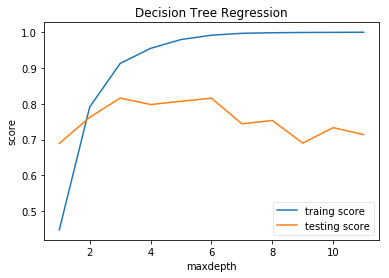

In [14]:
X_train,X_test,y_train,y_test=creat_data(df_X,y,test_size=0.1)    
test_DecisionTreeRegressor_depth(X_train,X_test,y_train,y_test,maxdepth=12)

In [15]:
regr_dtr = DecisionTreeRegressor(max_depth=3)
regr_dtr.fit(X_train, y_train)
# y_predict=regr_dtr.predict(X_test, y_test)
# y_predict
regr_dtr.score(X_test, y_test)
makeTable0(df_X.columns.tolist(),regr_dtr.tree_.compute_feature_importances())

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

0.8159350920263679

CMA,0.00527572
Exchange,0.00000000
HML,0.01626881
SMB,0.97845547


#### 自动0.25样本

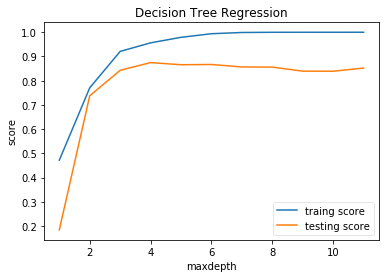

In [16]:
X_train,X_test,y_train,y_test=creat_data(df_X,y,test_size=0.25)    
test_DecisionTreeRegressor_depth(X_train,X_test,y_train,y_test,maxdepth=12)

In [17]:
regr_dtr = DecisionTreeRegressor(max_depth=4)
regr_dtr.fit(X_train, y_train)
regr_dtr.score(X_test, y_test)
makeTable0(df_X.columns.tolist(),regr_dtr.tree_.compute_feature_importances())

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

0.874601084501708

CMA,0.00000000
Exchange,0.00104863
HML,0.02286538
SMB,0.97608599


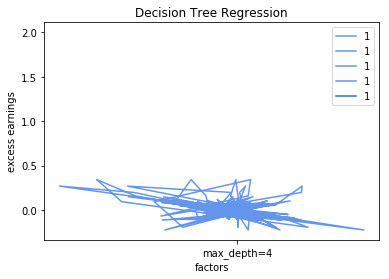

In [18]:
X_test=df_X
y_test=y
pic(plt,X_test,y_test,label="max_depth=4")

In [19]:
regr_dtr.tree_.threshold

array([-1.16017624e-03, -1.07185587e-01, -1.53577894e-01, -2.00000000e+00,
       -4.03762460e-02, -2.00000000e+00, -2.00000000e+00, -6.19051196e-02,
       -7.36382902e-02, -2.00000000e+00, -2.00000000e+00, -2.58537866e-02,
       -2.00000000e+00, -2.00000000e+00,  8.06282163e-02,  3.90879214e-02,
       -2.08135433e-02, -2.00000000e+00, -2.00000000e+00, -4.68449742e-02,
       -2.00000000e+00, -2.00000000e+00,  6.94053760e-03, -2.00000000e+00,
       -2.00000000e+00])

In [20]:
regr_dtr.tree_.feature

array([ 3,  3,  3, -2,  2, -2, -2,  3,  3, -2, -2,  3, -2, -2,  3,  3,  2,
       -2, -2,  2, -2, -2,  1, -2, -2])

In [21]:
# regr_dtr.tree_.value

### 决策树回归 新四因子回归 手动分割样本

In [22]:
def creat_data2(X,y,test_size=0.25):
    countX=len(X)
    if(countX!=len(y)):
        print("X and y are not same shape")
    else:
        countTest=int(countX*test_size)
        countTrain=countX-countTest
        X_train_tmp=X[:countTrain]
        X_test_tmp=X[countTrain:]
        y_train_tmp=y[:countTrain]
        y_test_tmp=y[countTrain:]
    return X_train_tmp,X_test_tmp,y_train_tmp,y_test_tmp
    

#### 手动0.1

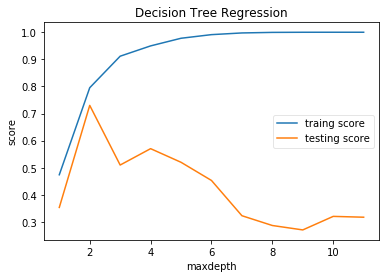

In [23]:
resetVar()
X_train,X_test,y_train,y_test=creat_data2(df_X,y,test_size=0.1)    
test_DecisionTreeRegressor_depth(X_train,X_test,y_train,y_test,maxdepth=12)

In [24]:
regr_dtr = DecisionTreeRegressor(max_depth=2)
regr_dtr.fit(X_train, y_train)

regr_dtr.score(X_test, y_test)
makeTable0(df_X.columns.tolist(),regr_dtr.tree_.compute_feature_importances())

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

0.7299998970035905

CMA,0.00000000
Exchange,0.00000000
HML,0.00000000
SMB,1.00000000


#### 手动0.3

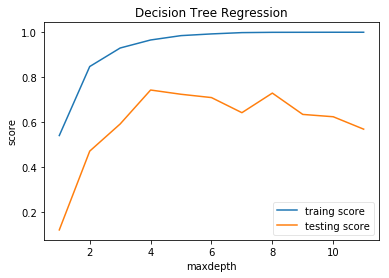

In [25]:
resetVar()
X_train,X_test,y_train,y_test=creat_data2(df_X,y,test_size=0.3)    
test_DecisionTreeRegressor_depth(X_train,X_test,y_train,y_test,maxdepth=12)

In [26]:
regr_dtr = DecisionTreeRegressor(max_depth=4)
regr_dtr.fit(X_train, y_train)

regr_dtr.score(X_test, y_test)
makeTable0(df_X.columns.tolist(),regr_dtr.tree_.compute_feature_importances())

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

0.660285278492676

CMA,0.01952166
Exchange,0.00000000
HML,0.00000000
SMB,0.98047834


#### 手动0.5

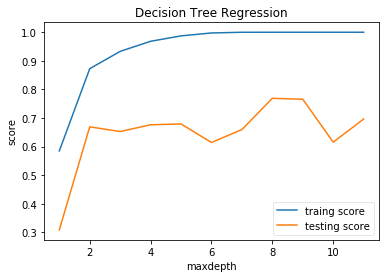

In [27]:
resetVar()
X_train,X_test,y_train,y_test=creat_data2(df_X,y,test_size=0.5)    
test_DecisionTreeRegressor_depth(X_train,X_test,y_train,y_test,maxdepth=12)

In [28]:
regr_dtr = DecisionTreeRegressor(max_depth=4)
regr_dtr.fit(X_train, y_train)

regr_dtr.score(X_test, y_test)
makeTable0(df_X.columns.tolist(),regr_dtr.tree_.compute_feature_importances())

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

0.68344190170285

CMA,0.01379677
Exchange,0.01663578
HML,0.02042490
SMB,0.94914256


In [29]:
#### 手动调整

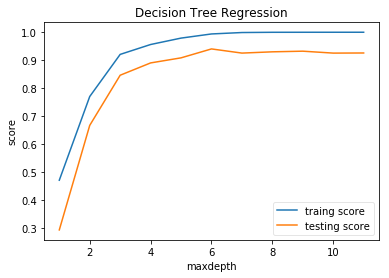

In [30]:
resetVar()
X_train,X_test,y_train,y_test=creat_data(df_X,y,test_size=0.25)   
X_train2,X_test2,y_train2,y_test2=creat_data2(df_X,y,test_size=0.3)    

test_DecisionTreeRegressor_depth(X_train,X_test2,y_train,y_test2,maxdepth=12)


In [31]:
regr_dtr = DecisionTreeRegressor(max_depth=6)
regr_dtr.fit(X_train, y_train)

regr_dtr.score(X_test2, y_test2)
makeTable0(df_X.columns.tolist(),regr_dtr.tree_.compute_feature_importances())

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

0.9404194223787996

CMA,0.01323960
Exchange,0.00740221
HML,0.02662604
SMB,0.95273216


###  使用GridSearchCV

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
# import sklearn.model_selection  as skm
# str(dir(skm))
# from sklearn.grid_search import GridSearchCV  #deprecated

from sklearn.pipeline import Pipeline  
from sklearn.model_selection  import GridSearchCV
# from sklearn.tree import DecisionTreeClassifier 
# DecisionTreeClassifier?
# Pipeline?
# GridSearchCV?


def print_best_score(gsearch,param_test):
     # 输出best score
#     print("Best score: %0.8f" % gsearch.best_score_)
    print("Best parameters set:")
    # 输出最佳的分类器到底使用了怎样的参数
    best_parameters = gsearch.best_estimator_.get_params()
    for param_name in sorted(param_test.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))



In [34]:
# pipeline = Pipeline([  
#     ('dt',DecisionTreeRegressor(criterion='mse'))  
# ])  
  
# parameters = {  
# 'dt__max_depth': [4],  
# 'dt__min_samples_split': [2,3],  
# 'dt__min_samples_leaf': [1,2]  
# }  

# grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,verbose=1, scoring='f1')  
# grid_search.fit(X_train.values, y_train)  
# print ('最佳效果：%0.3f' %grid_search.best_score_)  
# print_best_score(grid_search,parameters)


In [35]:
from sklearn.feature_extraction import DictVectorizer #特征转换器
from sklearn.metrics import classification_report

vec = DictVectorizer(sparse=False)
X_train = vec.fit_transform(X_train.to_dict(orient='record'))   #对训练数据的特征进行提取
X_test = vec.transform(X_test.to_dict(orient='record'))         #对测试数据的特征进行提取
#转换特征后，凡是类别型型的特征都单独独成剥离出来，独成一列特征，数值型的则不变
print(vec.feature_names_)

['CMA', 'Exchange', 'HML', 'SMB']


In [36]:
# df_X.to_clipboard()
# CMA	Exchange	HML	SMB
# 2010-05-04	0.051764043866293456	0.00013185654008451841	-0.07158914299303834	0.07252106990148692
# 2010-06-04	0.04589595542825302	0.0003222734930052873	-0.049275457202137836	0.0638688047609563
# 2010-07-06	0.02278063591157331	-0.007058444506275019	-0.005557325195421171	0.033867149632131735
# 2010-08-06	-0.07345906331567294	-0.001799277339429195	0.015206953709745357	-0.0906915711568445
# 2010-09-08	-0.016917872436033883	0.003826662529734293	-0.03260151646351815	-0.017744132034911802
# 2010-10-08	-0.03181289107088323	-0.017985929174884396	-0.031514348259059674	-0.02479448885858301


In [37]:
param_grid = {  
'max_depth': range(4,12),  
'min_samples_split': range(2,3),  
'min_samples_leaf': range(1,2)
} 
# dt=DecisionTreeRegressor(max_depth=4,min_samples_split=2,min_samples_leaf=1)
# dt.fit(X_train, y_train)
### GridSearchCV使用的参数不对，导致一直报错，好在使用逐步分析法，发现了如下问题，
### 就是拆解步骤，DecisionTreeRegressor()，X_train,GridSearchCV一个一个的步骤分别test，
# grid_search = GridSearchCV(DecisionTreeRegressor(max_depth=4), param_grid, n_jobs=-1,verbose=1, scoring='f1')  
# RemoteTraceback: 
# """
# Traceback (most recent call last):
#   File "/usr/local/lib/python3.6/site-packages/sklearn/externals/joblib/_parallel_backends.py", line 350, in __call__
#     return self.func(*args, **kwargs)

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid)  
grid_search.fit(X_train, y_train) 
print_best_score(grid_search,param_grid)
y_predict=grid_search.predict(X_test)
###classification_report 确实是给分类决策树用的，所以此处报错，ValueError: Unknown label type: 
# classification_report(y_predict,y_test,target_names=['died','servived'])
# print(classification_report(y_test,y_predict))

### 但是预测结果是动态的，每次运行都有一个新的值，
# Best parameters set:
# 	max_depth: 9
# 	min_samples_leaf: 1
# 	min_samples_split: 5

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(4, 12), 'min_samples_split': range(2, 3), 'min_samples_leaf': range(1, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best parameters set:
	max_depth: 9
	min_samples_leaf: 1
	min_samples_split: 2


In [38]:
from sklearn.externals.six import StringIO 
import pydot 
from IPython.display import Image,HTML
from sklearn import tree
dot_data = StringIO()  
tree.export_graphviz(regr_dtr, out_file=dot_data,  
                         feature_names=vec.feature_names_,  
                         filled=True, rounded=True,  
                         special_characters=True)  
# dot_data.getvalue()
# 'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<SMB &le; -0.001<br/>mse = 0.007<br/>samples = 71<br/>value = 0.001>, fillcolor="#e5813966"] ;\n1 [label=<SMB &le; -0.107<br/>mse = 0.004<br/>samples = 39<br/>value = 0.052>, fillcolor="#e581397c"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<SMB &le; -0.154<br/>mse = 0.008<br/>samples = 4<br/>value = 0.196>, fillcolor="#e58139bd"] ;\n1 -> 2 ;\n3 [label=<mse = 0.0<br/>samples = 1<br/>value = 0.342>, fillcolor="#e58
# graph = pydot.graph_from_dot_data(dot_data.getvalue())  #pydot.Dot print为list
# Image(graph.create_png()) #graph没有create_png，是个list
HTML(dot_data.getvalue())

### 岭回归Ridge

In [39]:
from sklearn import linear_model
def test_ridge(*data):
    X_train, X_test, y_train, y_test = data
    ridgeRegression = linear_model.Ridge()
    ridgeRegression.fit(X_train, y_train)
    print("权重向量:%s, b的值为:%.2f" % (ridgeRegression.coef_, ridgeRegression.intercept_))
    print("损失函数的值:%.2f" % np.mean((ridgeRegression.predict(X_test) - y_test) ** 2))
    print("预测性能得分: %.2f" % ridgeRegression.score(X_test, y_test))

#测试不同的α值对预测性能的影响
def test_ridge_alpha(*data):
    X_train, X_test, y_train, y_test = data
    alphas = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
    scores = []
    for i, alpha in enumerate(alphas):
        ridgeRegression = linear_model.Ridge(alpha=alpha)
        ridgeRegression.fit(X_train, y_train)
        scores.append(ridgeRegression.score(X_test, y_test))
    return alphas, scores

def show_plot(alphas, scores):
    figure = plt.figure()
    ax = figure.add_subplot(1, 1, 1)
    ax.plot(alphas, scores)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"score")
    ax.set_xscale("log")
    ax.set_title("Ridge")
    plt.show()

权重向量:[-0.10164708 -0.00598427  0.11030978 -0.26628297], b的值为:0.00
损失函数的值:0.00
预测性能得分: 0.21


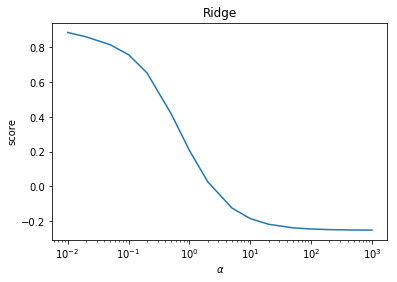

In [50]:
X_train, X_test, y_train, y_test = creat_data(df_X,y)
# 使用默认的alpha
test_ridge(X_train, X_test, y_train, y_test)

#使用自己设置的alpha

alphas, scores = test_ridge_alpha(X_train, X_test, y_train, y_test)
show_plot(alphas, scores)


In [ ]:
np.log(np.e)

### Lasso回归

In [47]:
from sklearn import linear_model, cross_validation
def test_lasso(*data):
    X_train, X_test, y_train, y_test = data
    lassoRegression = linear_model.Lasso()
    lassoRegression.fit(X_train, y_train)
    print("权重向量:%s, b的值为:%.2f" % (lassoRegression.coef_, lassoRegression.intercept_))
    print("损失函数的值:%.2f" % np.mean((lassoRegression.predict(X_test) - y_test) ** 2))
    print("预测性能得分: %.2f" % lassoRegression.score(X_test, y_test))

#测试不同的α值对预测性能的影响
def test_lasso_alpha(*data):
    X_train, X_test, y_train, y_test = data
    alphas = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
    scores = []
    for i, alpha in enumerate(alphas):
        lassoRegression = linear_model.Lasso(alpha=alpha)
        lassoRegression.fit(X_train, y_train)
        scores.append(lassoRegression.score(X_test, y_test))
    return alphas, scores

def show_plot(alphas, scores):
    figure = plt.figure()
    ax = figure.add_subplot(1, 1, 1)
    ax.plot(alphas, scores)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"score")
    ax.set_xscale("log")
    ax.set_title("Ridge")
    plt.show()

权重向量:[-0. -0.  0. -0.], b的值为:0.00
损失函数的值:0.00
预测性能得分: -0.25


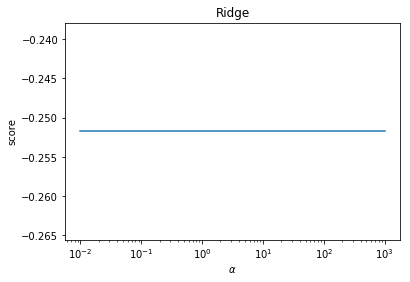

In [51]:
X_train, X_test, y_train, y_test = creat_data(df_X,y)
# 使用默认的alpha
test_lasso(X_train, X_test, y_train, y_test)

# 使用自己设置的alpha
alphas, scores = test_lasso_alpha(X_train, X_test, y_train, y_test)
show_plot(alphas, scores)